In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, homogeneity_score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [4]:
data = pd.read_csv('Leukemia.csv')

In [5]:
X = data.drop('type', axis = "columns")
Y = data['type']
feature_names = X.columns

### Normalizacija podataka

In [6]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = feature_names)

In [7]:
sse = []
silh = []

ks = [i for i in range(5,20)]
for k in range(5,20):
    kmeans = KMeans(n_clusters = k, n_init = 'auto')
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    silh.append(silhouette_score(X, kmeans.labels_))

Text(0, 0.5, 'SSE')

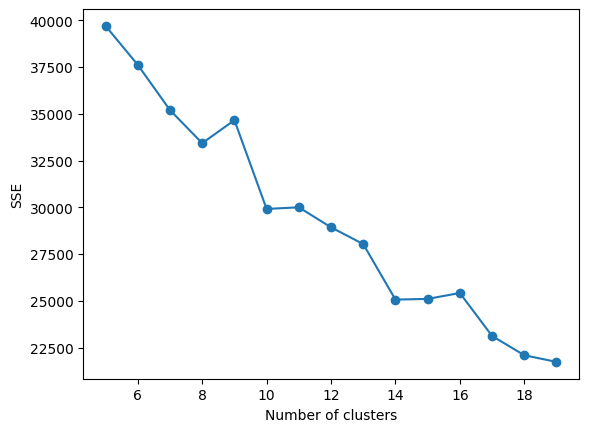

In [8]:
plt.plot(ks, sse, marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")

Text(0, 0.5, 'SSE')

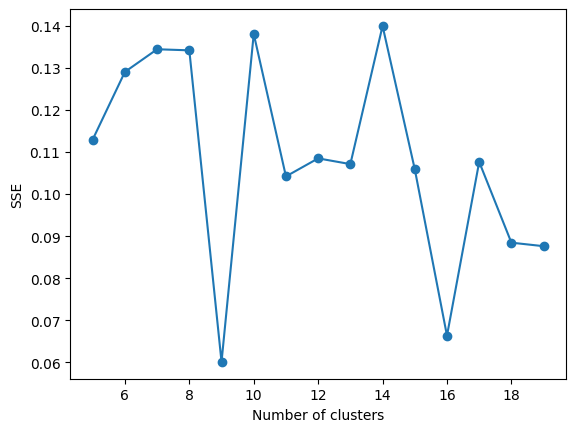

In [9]:
plt.plot(ks, silh, marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")

Pomocu pravila lakta i grafika promene siluete vidimo da je otprilike podjednako dobro uzeti da broj klastera bude 6 ili 7

In [10]:
km6 = KMeans(n_clusters = 6, n_init = 'auto')
km7 = KMeans(n_clusters = 7, n_init = 'auto')

## PCA vizuelizacija

In [11]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = feature_names)
pca = PCA()
x = pca.fit_transform(X)

In [17]:
pca.explained_variance_ratio_[0:2].sum()

0.3616021352757539

Sa dve komponente objasnili smo samo 36% varijanse.

In [31]:
Y.replace("AML", 0, inplace = True)
Y.replace("Bone_Marrow", 1, inplace = True)
Y.replace("Bone_Marrow_CD34", 2, inplace = True)
Y.replace("PB", 3, inplace = True)
Y.replace("PBSC_CD34", 4, inplace = True)
Y.unique()

array([2, 1, 0, 3, 4])

- 0 -> AML
- 1 -> Bone_Marrow
- 2 -> Bone_Marrow_CD34
- 3 -> PB
- 4 -> PBSC_CD34

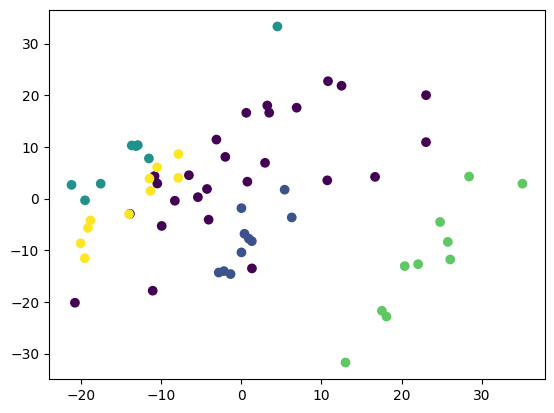

In [32]:
s = plt.scatter(x[:, 0], x[:, 1], c = Y)

## PCA vizuelizacija izbora broja klastera

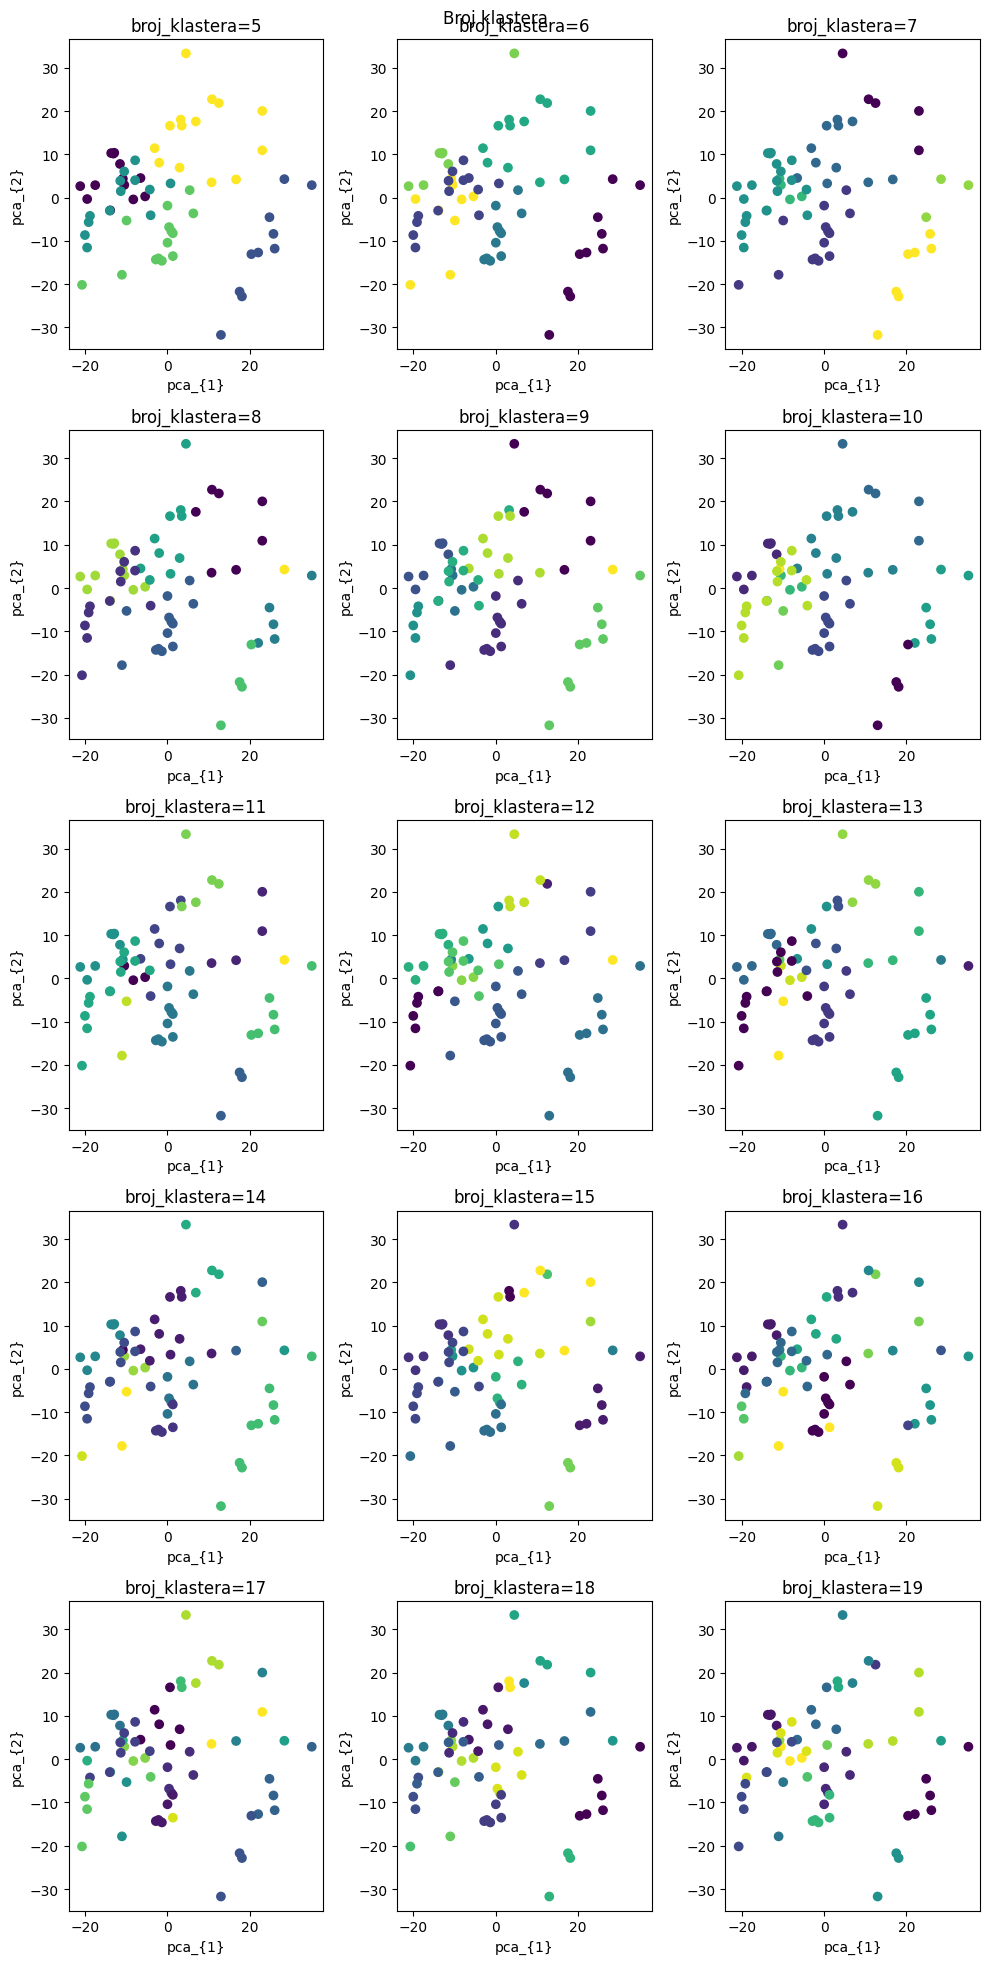

In [38]:
ks = [i for i in range(5, 20)]
sse = []
silh = []
fig, axs = plt.subplots(5, 3, figsize=(10, 20))
fig.suptitle("Broj klastera")

for k, ax in zip(ks, axs.flatten()):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(x)

    ax.scatter(x[:, 0], x[:, 1], c=kmeans.labels_)
    ax.set_title(f"broj_klastera={k}")
    ax.set_xlabel("pca_{1}")
    ax.set_ylabel("pca_{2}")

    sse.append(kmeans.inertia_)
    silh.append(silhouette_score(X, kmeans.labels_))

plt.tight_layout()
plt.show()